### IDs:
Insert yours IDs to the cell below

ID #1:329827190

ID #2:204818181


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a scatter plot. If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>

#### 1.A
Data in which the Pearson(x,y)>0.9 but where n-1 points can be selected so that for the vectors restricted to those we have Pearson correlation <0.1

Text(0.5, 1.0, 'Correlation for n data points: 0.99999')

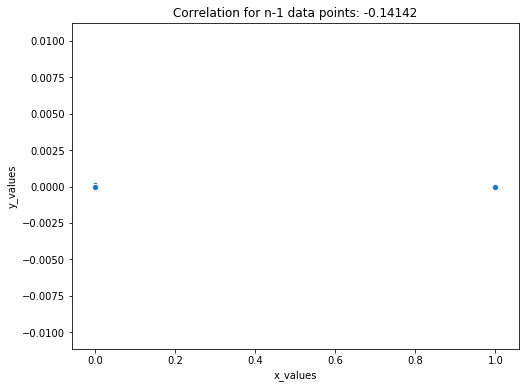

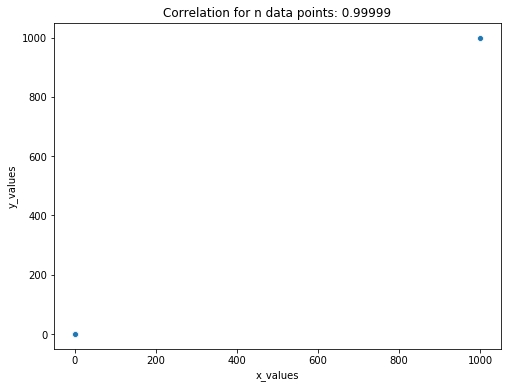

In [2]:
# Generating a set of n-1 values pairs
x_values = ([0] * 25)
x_values.extend([1]*24)
y_values = [0] * 49
y_values[0] = 0.0001

df = pd.DataFrame({'x_values': x_values, "y_values": y_values})
c = stats.pearsonr(df['x_values'],df['y_values'])

plt.figure(figsize=(8,6))
sns.scatterplot(x = 'x_values',y='y_values',data=df);
plt.title('Correlation for n-1 data points: {:0.5}'.format(c[0]))

# Adapting the set of data to be n pairs
x_values.append(1000)
y_values.append(1000)

df = pd.DataFrame({'x_values': x_values, "y_values": y_values})
c = stats.pearsonr(df['x_values'],df['y_values'])

plt.figure(figsize=(8,6))
sns.scatterplot(x = 'x_values',y='y_values',data=df);
plt.title('Correlation for n data points: {:.5}'.format(c[0]))

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.4 

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25. -25. -24. -23.
 -22. -21. -20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.
  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.]
SpearmanrResult(correlation=-0.5006002400960383, pvalue=0.00021363685414402554)


KendalltauResult(correlation=-0.020408163265306124, pvalue=0.8343534347326886)

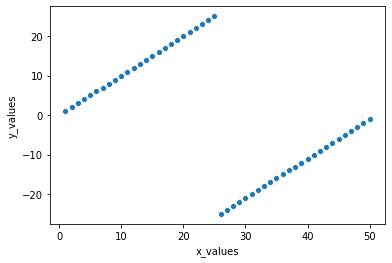

In [3]:
x_values = np.linspace(1,50,50)
temp = x_values[:len(x_values)//2]*(-1)
y_values = np.linspace(1,25,25)
# y_values= np.append(y_values,temp)
y_values= np.append(y_values,np.flip(temp))

df = pd.DataFrame({'x_values': x_values, "y_values": y_values})

print(x_values)
print(y_values)

sns.scatterplot(x = 'x_values',y='y_values',data=df);

print(stats.spearmanr(x_values,y_values))
stats.kendalltau(x_values,y_values)

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.4 

SpearmanrResult(correlation=0.5006002400960383, pvalue=0.00021363685414402554)


KendalltauResult(correlation=0.020408163265306124, pvalue=0.8343534347326886)

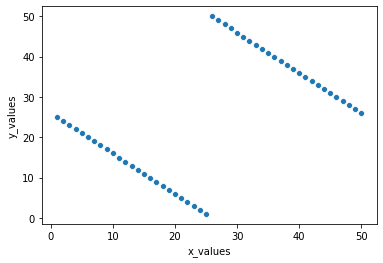

In [4]:
x_values = np.linspace(1,50,50)
y_values = np.linspace(25,1,25)
y_values = np.append(y_values, np.linspace(50,26,25))
df = pd.DataFrame({'x_values': x_values, "y_values": y_values})

# print(x_values)
# print(y_values)

sns.scatterplot(x = 'x_values',y='y_values',data=df);

print(stats.spearmanr(x_values,y_values))
stats.kendalltau(x_values,y_values)

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

In [5]:
x_values = np.linspace(1,50,50)
y_values = np.append(np.linspace(1,49,49), -500)

df = pd.DataFrame({'x_values': x_values, "y_values": y_values})

print('Pearson: {}'.format(stats.pearsonr(x_values,y_values)))
print('Spearman: {}'.format(stats.spearmanr(x_values,y_values)))

Pearson: (-0.05672669004870723, 0.695584227805784)
Spearman: SpearmanrResult(correlation=0.8823529411764706, pvalue=2.498897813703167e-17)


#### 1.E
Data with Pearson(x,y) < ρ(x,y) – 1.2

In [6]:
x_values = np.linspace(1,50,50)
y_values = np.append(np.linspace(1,49,49), -500)

df = pd.DataFrame({'x_values': x_values, "y_values": y_values})

print('Pearson: {}'.format(stats.pearsonr(x_values,y_values)))
print('Spearman: {}'.format(stats.spearmanr(x_values,y_values)))

Pearson: (-0.05672669004870723, 0.695584227805784)
Spearman: SpearmanrResult(correlation=0.8823529411764706, pvalue=2.498897813703167e-17)


#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

//TODO
cant be because we need kendall to be negative and the other positive.
" positive correlation signifies that the ranks of both the variables are 
increasing.  On the other hand, the negative correlation signifies that as 
the rank of one variable is increased, the rank of the other variable is decreased."

### Question 2 - Analysis of the Indian Liver Patient Dataset (50 points)

Perform data analysis on the Indian Liver Patient Dataset
References:
* Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, A Critical Comparative Study of Liver Patients from USA and INDIA: An Exploratory Analysis, International Journal of Computer Science Issues, ISSN :1694-0784, May 2012. 
* Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, A Critical Study of Selected Classification Algorithms for Liver Disease Diagnosis, International Journal of Database Management Systems (IJDMS), Vol.3, No.2, ISSN : 0975-5705, PP 101-114, May 2011.

Use the following link to find the details of the data: https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine features for which you can state with confidence of 95% that the healthy population mean is larger/smaller than the disease population mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


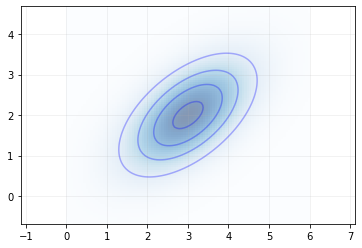

In [7]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

In [8]:
data = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",header= None)
data = data.drop(11,axis=1)
data.columns = ["Age","Gender","TB","DB","AAP","SAlam","SAsp","TP","ALB","AGRatio","Target"]
data = data.fillna(data.median())   
data

,Age,Gender,TB,DB,AAP,SAlam,SAsp,TP,ALB,AGRatio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [9]:
healthy = data[data['Target'] == 2]
sick = data[data['Target'] == 1]

Using confidence intervals determine features for which you can state with confidence of 95% that the healthy population mean is larger/smaller than the disease population mean.

In [10]:
def confidenceInterval(healthy_data, sick_data, alpha = 1-0.95):
    z_critical = stats.norm.ppf((1 - alpha/2.0))# Get the z-critical value*
    healthy_sample_mean = healthy_data.mean()
    sick_sample_mean = sick_data.mean()
    xy_diff_mean = healthy_sample_mean - sick_sample_mean
    healthy_stdev = healthy_data.var()  # Get the population variance
    sick_stdev = sick_data.var()
    # this is the var of X - Y. where X is the mean in health population and Y in sick population
    diff_stdev = sick_stdev/sick_data.size + healthy_stdev/healthy_data.size 
    margin_of_error = z_critical * (np.sqrt(diff_stdev))
    confidence_interval = (xy_diff_mean - margin_of_error,xy_diff_mean + \
                           margin_of_error)  
    return confidence_interval

In [11]:
for features in data.columns:
    if (features is not "Gender" and features is not "Target"):
        results = confidenceInterval(healthy[features], sick[features])
        print(features)
        print(results)

        ##TODO LATER IN LIFE


Age
(-7.899330243543334, -1.9293201479813136)
TB
(-3.7251903562556024, -2.318625857470791)
DB
(-1.845221892852936, -1.2090791205049638)
AAP
(-132.74893005048648, -65.75651099050846)
SAlam
(-86.74936843545973, -45.15678080452185)
SAsp
(-129.89939411189297, -64.12239884066344)
TP
(-0.10852970037549536, 0.276488014516442)
ALB
(0.1428759607854385, 0.42459294755173305)
AGRatio
(0.06069183051301766, 0.167565021168235)


Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.

For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).

Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?

For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

### Question 3 - Log Normal (15 points)

Consider Y1 ~ LogNormal(0,0.25) (recall that μ and σ are the mean and std of the underlying normal distribution)  and Y2 ~ LogNormal(0,1).

#### 3.A
Draw a plot of the pdfs for Y1 and Y2 on the same axes, over the x range of [0 10].

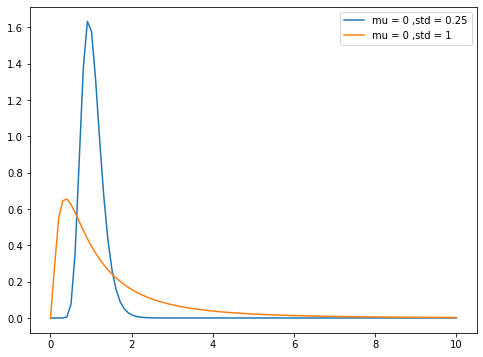

In [12]:
mu1, sigma1 = 0, 0.25
mu2, sigma2 = 0, 1

data = np.linspace(0,10,100)

y1 = stats.lognorm.pdf(data, sigma1, scale = np.exp(mu1))
y2 = stats.lognorm.pdf(data, sigma2, scale = np.exp(mu2))

plt.figure(figsize=(8,6))
plt.plot(data, y1, label ="mu = 0 ,std = 0.25")
plt.plot(data, y2, label ="mu = 0 ,std = 1")
plt.legend()
plt.show()


#### 3.B
What is E(Y1)? E(Y2)?

In [13]:
mu1_new = stats.lognorm.mean(sigma1,scale = np.exp(mu1))
mu2_new = stats.lognorm.mean(sigma2,scale = np.exp(mu2))
print("E(Y1): {:.4}\nE(Y2): {:.4}".format(mu1_new, mu2_new))

E(Y1): 1.032
E(Y2): 1.649


#### 3.C
What is the probability of Y1 being more than 4 stds larger than its mean?

In [14]:
std1_new = stats.lognorm.std(sigma1,scale = np.exp(mu1))
prob = stats.lognorm.sf(mu1_new + 4 * std1_new, sigma1, scale = np.exp(mu1))
print("Probability of Y1 being at least 4 std from the mean is: {:.4}".format(prob))

Probability of Y1 being at least 4 std from the mean is: 0.0017


#### 3.D
What is the probability of Y2 being more than 4 stds larger than its mean?

In [15]:
std2_new = stats.lognorm.std(sigma2, scale = np.exp(mu2))
prob = stats.lognorm.sf(mu2_new + 4 * std2_new, sigma2, scale = np.exp(mu2))
print("Probability of Y2 being at least 4 std from the mean is: {:.4}".format(prob))

Probability of Y2 being at least 4 std from the mean is: 0.009863


#### 3.E
What is the IQR of Y1? Of Y2?

In [16]:
y1_IQR = stats.lognorm.ppf(0.75,sigma1,scale = np.exp(mu1)) - stats.lognorm.ppf(0.25,sigma1,scale = np.exp(mu1))
y2_IQR = stats.lognorm.ppf(0.75,sigma2,scale = np.exp(mu2)) - stats.lognorm.ppf(0.25,sigma2,scale = np.exp(mu2))

print("IQR for Y1: {:.5} and IQR for Y2: {:.5}".format(y1_IQR, y2_IQR))

IQR for Y1: 0.33885 and IQR for Y2: 1.4536


### Question 4 - CLT for Markov chains (20 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the $i+1st$, $X_{i+1}$, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.5 & 0.2 & 0.05 & 0 & 0.05 & 0.2 \\
0.2 & 0.5 & 0.2 & 0.05 & 0 & 0.05 \\
0.05 & 0.2 & 0.5 & 0.2 & 0.05 & 0 \\
0 & 0.05 & 0.2 & 0.5 & 0.2 & 0.05 \\
0.05 & 0 & 0.05 & 0.2 & 0.5 & 0.2 \\
0.2 & 0.05 & 0 & 0.05 & 0.2 & 0.5
\end{pmatrix}
\end{equation*}

In [17]:
T = np.array([[0.50, 0.20, 0.05, 0.00, 0.05, 0.20],
     [0.20, 0.50, 0.20, 0.05, 0.00, 0.05],
     [0.05, 0.20, 0.50, 0.20, 0.05, 0.00],
     [0.00, 0.05, 0.20, 0.50, 0.20, 0.05],
     [0.05, 0.00, 0.05, 0.20, 0.50, 0.20],
     [0.20, 0.05, 0.00, 0.05, 0.20, 0.50]])
dice_prob = [1/6] * 6
dice_num = np.linspace(1,6,6)
print(dice_prob)
print(dice_num)

[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
[1. 2. 3. 4. 5. 6.]


#### 4.A
Construct 1000 trajectories, each of length 20.
1. What do you expect the average value of all 20 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 100 bins.
3. What does the distribution look like? What are the empirical mean and the std?

The expected value of all 20 number: 3.5
The mean is 3.477 and the standard dev is 0.7236


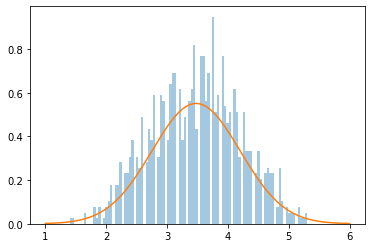

In [18]:
#4A1
def expected_value(traj_length, prob_arr):
    res=0
    # For every toss - a total of giveb length
    for i in range(traj_length):
#         print(i)
        res = res + np.sum(prob_arr*dice_num)
        # Updating dice probability using T
        prob_arr = T.dot(prob_arr)
        
    return res/traj_length
    

print("The expected value of all 20 number: {:.4}".format(expected_value(20,dice_prob)))

#4A2
import random

def calc_trajectories (traj_length, prob_arr, trans_matrix):
#     original_probs = prob_arr
    experiments = [0]*1000
    # For each experiment
    for i in range (1000):
        res = 0
#         curr_prob = original_probs
        curr_prob = prob_arr
        # Do the 20 tosses
        for j in range(traj_length):
            toss_value = np.random.choice(dice_num, p=curr_prob)
            res += toss_value
            curr_prob = trans_matrix[int(toss_value-1),:]
        experiments[i] = res/traj_length
    return experiments
    
    
res = calc_trajectories(20,dice_prob, T)
res = np.asarray(res)
print("The mean is {:.4} and the standard dev is {:.4}".format(res.mean(), res.std()))
sns.distplot(res, bins = 100, kde=False, norm_hist=True)
X = np.linspace(1,6,1000)
plt.plot(X, stats.norm.pdf(X, loc = res.mean(), scale = res.std()))


#### 4.B
Construct 1000 trajectories, each of length 2000.
1. What do you expect the average value of all 2000 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 100 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [ ]:
#4A3
print("The expected value of all 2000 number: {}".format(expected_value(2000,dice_prob)))


# res2 = calc_trajectories(2000,dice_prob, T)
# res2 = np.asarray(res2)
# print("The mean is {:.4} and the standard dev is {:.4}".format(res2.mean(), res2.std()))
# sns.distplot(res2, bins = 100, kde=False, norm_hist=True)
# X2 = np.linspace(1,6,1000)
# plt.plot(X2, stats.norm.pdf(X2, loc = res2.mean(), scale = res2.std()))


#### 4.C
Draw normal fit curves on your two histograms.

#### 4.D - Bonus
Can you try to formulate a CLT for Markov chains from your findings?